In [1]:
import numpy as np

from utils import pickle_load, pickle_save
from aci import prepare_scores

/home/asuka/anaconda3/envs/py3/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


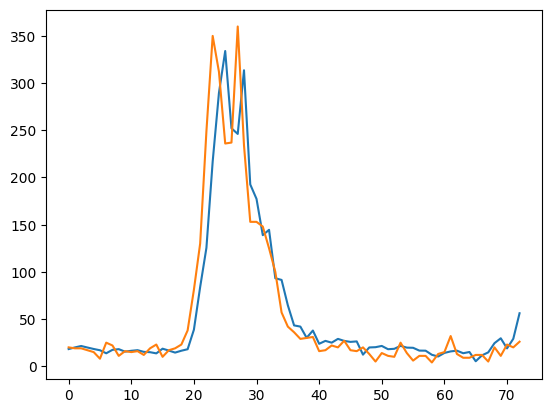

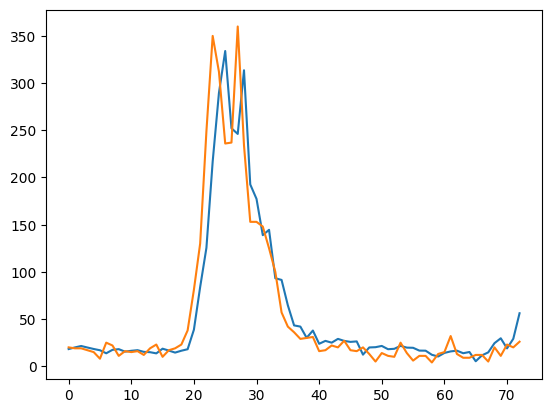

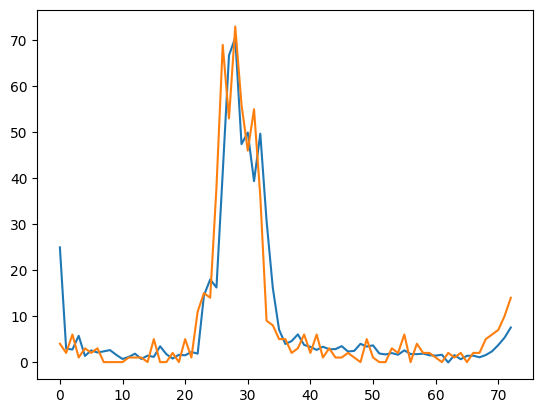

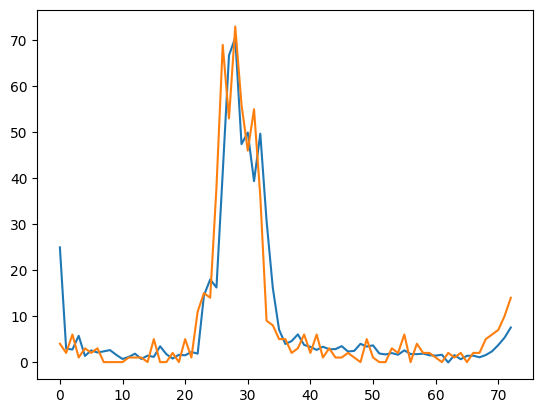

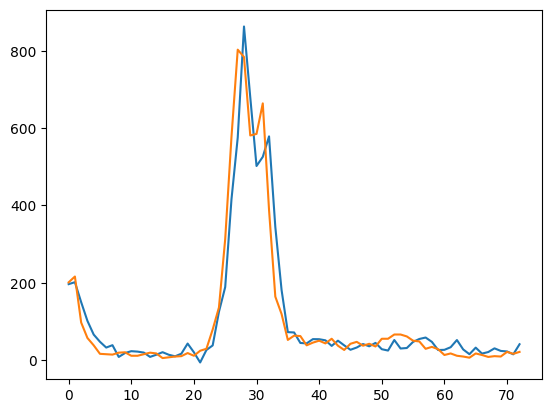

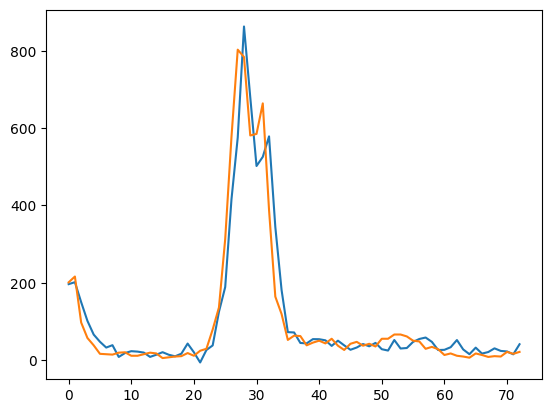

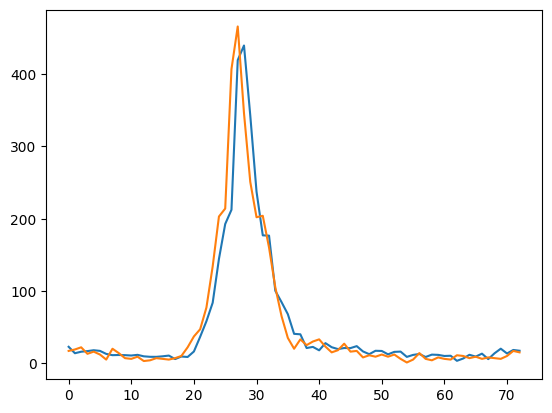

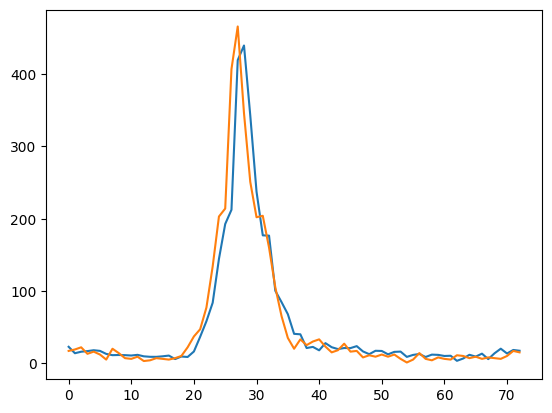

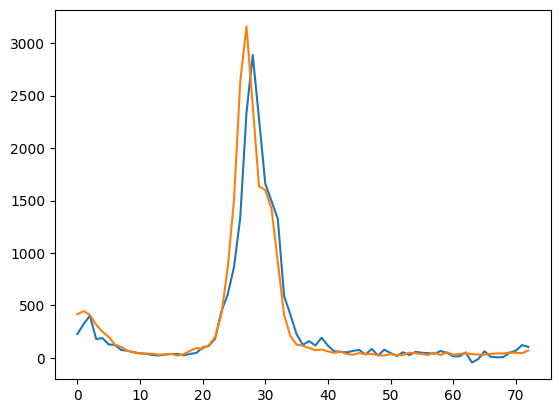

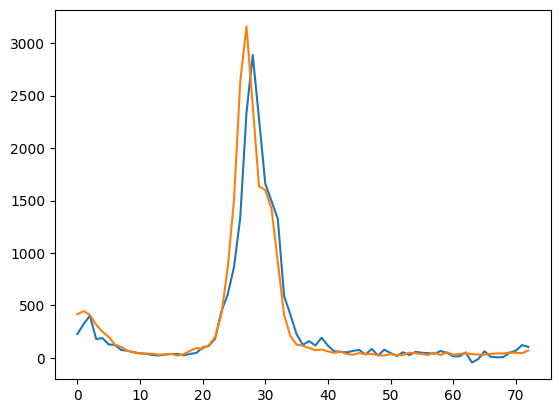

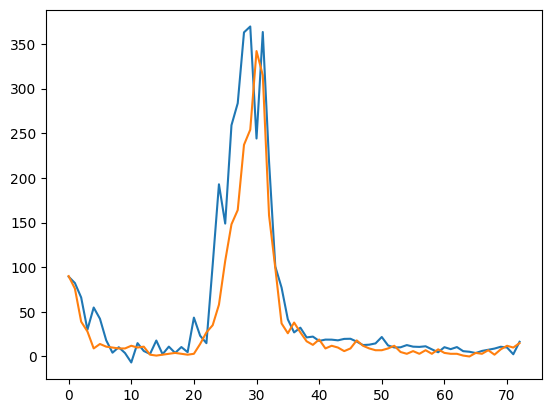

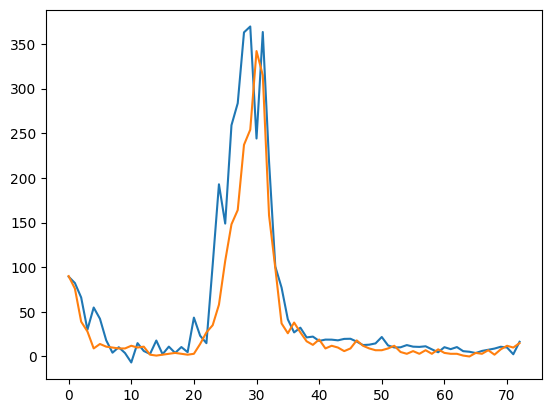

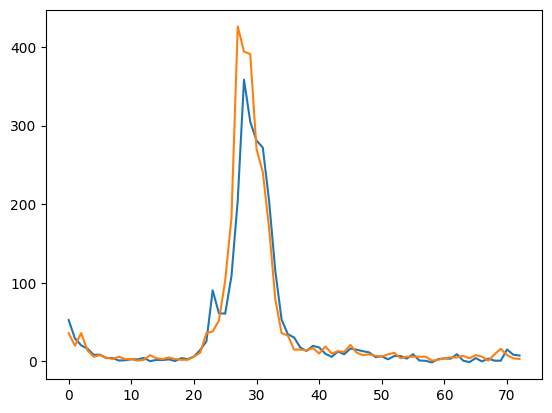

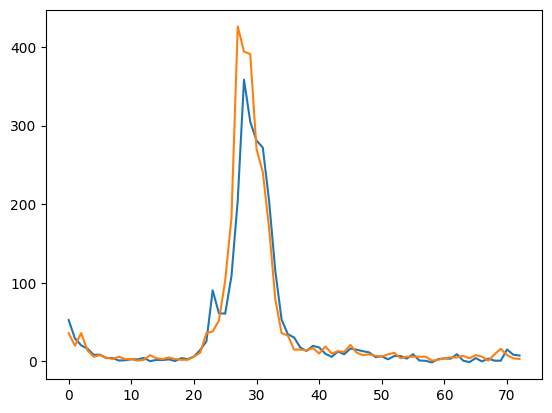

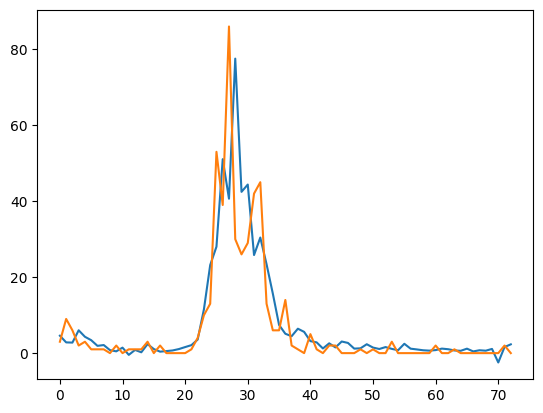

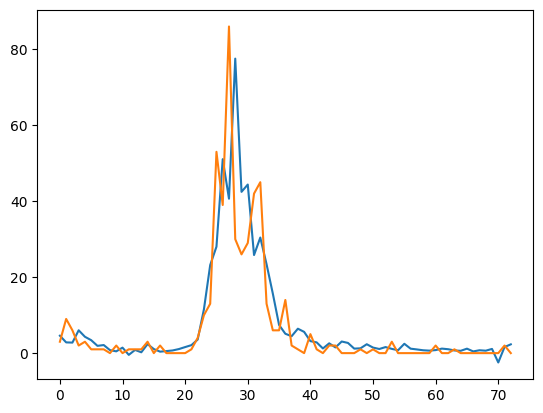

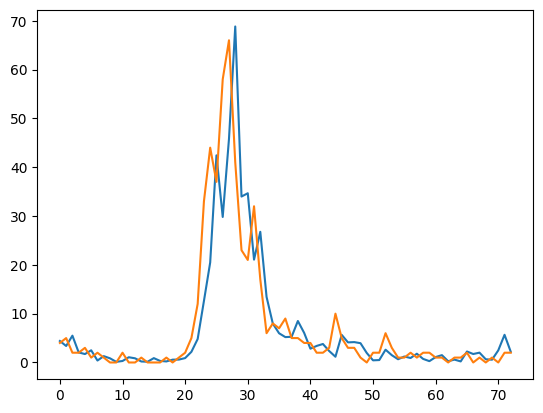

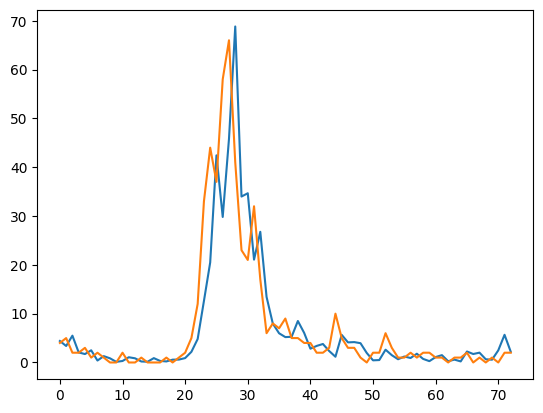

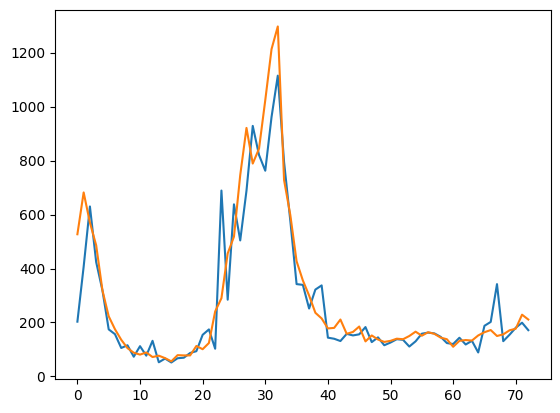

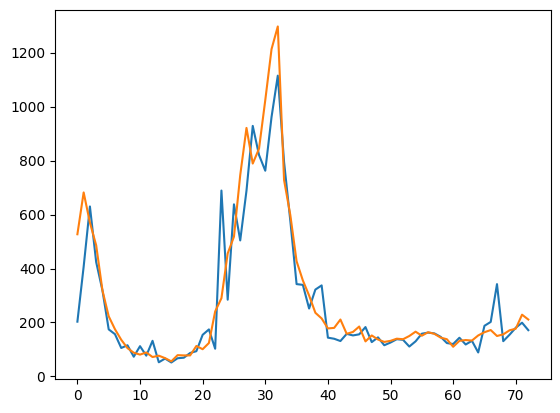

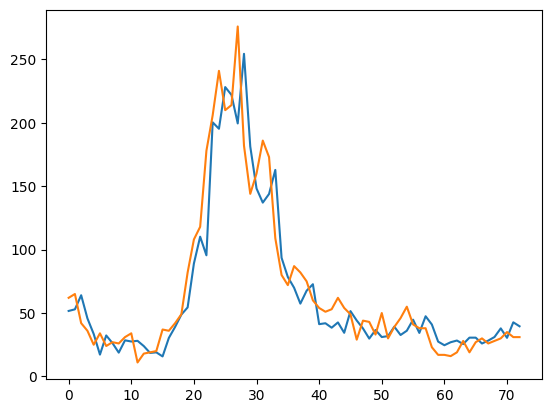

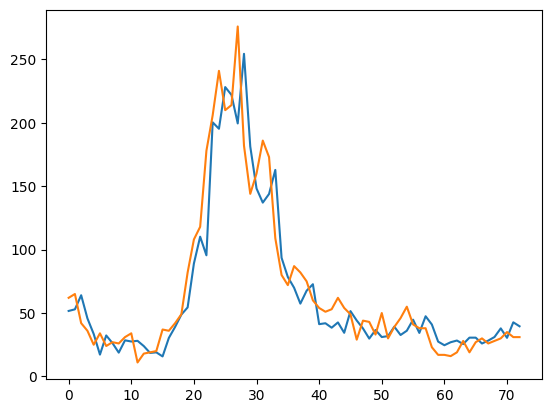

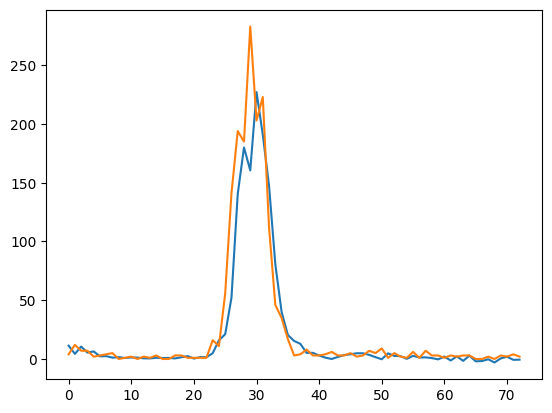

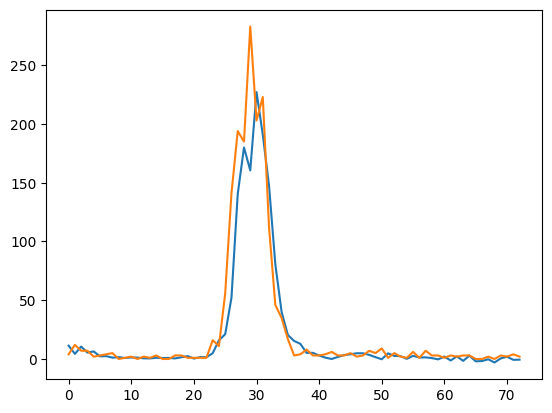

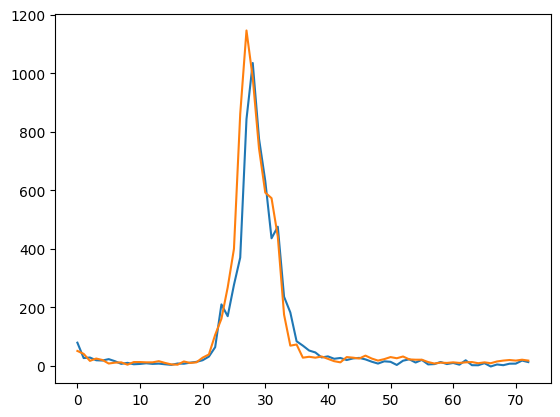

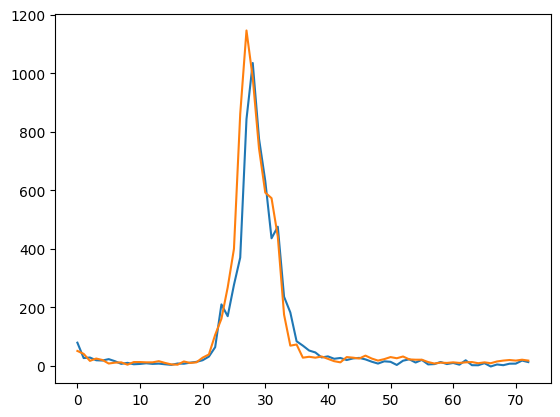

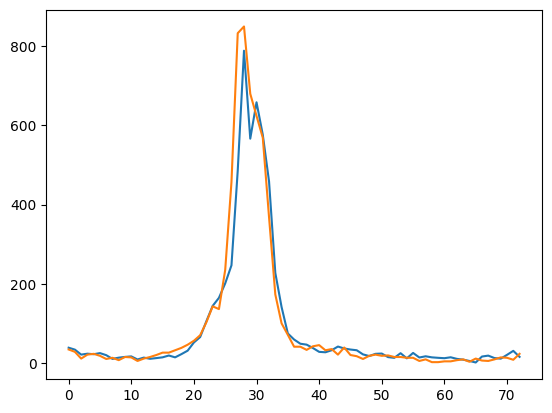

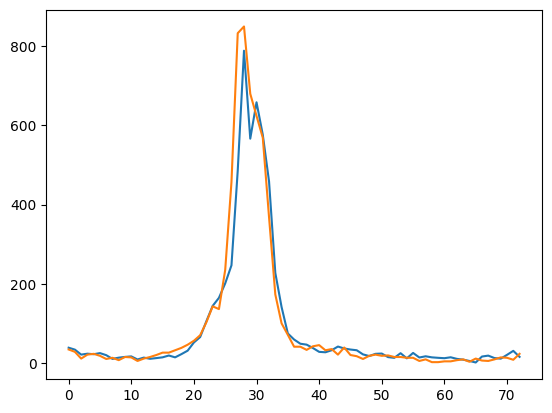

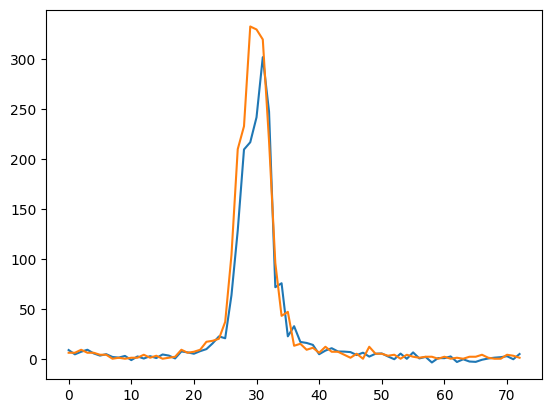

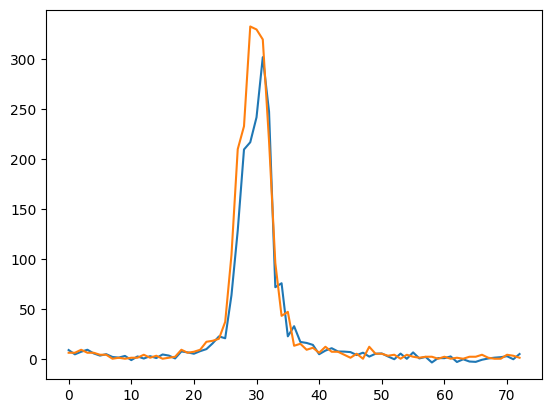

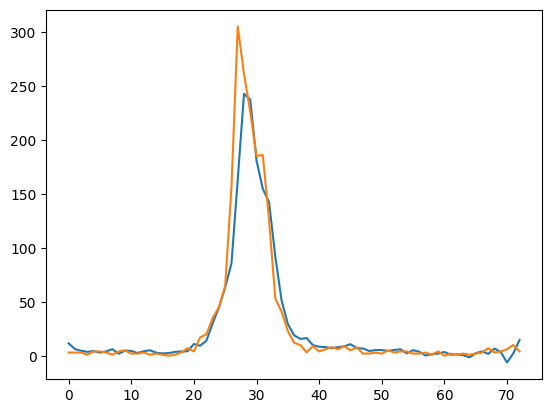

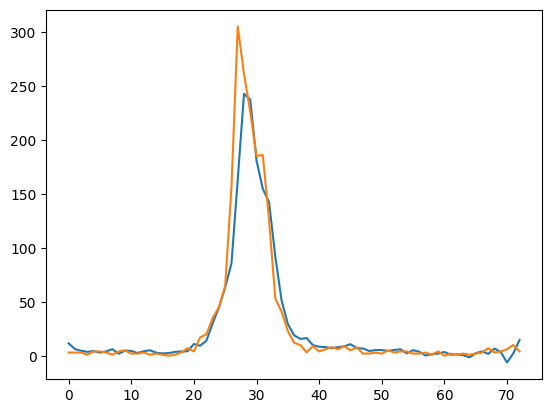

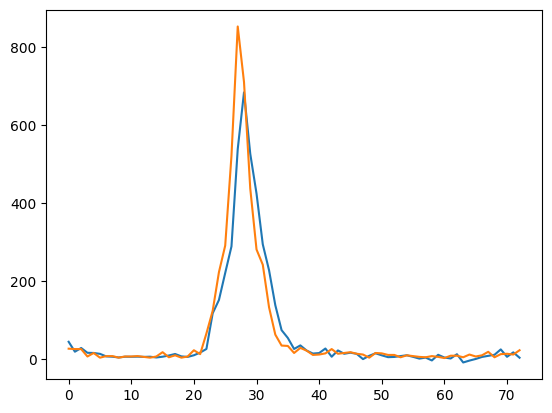

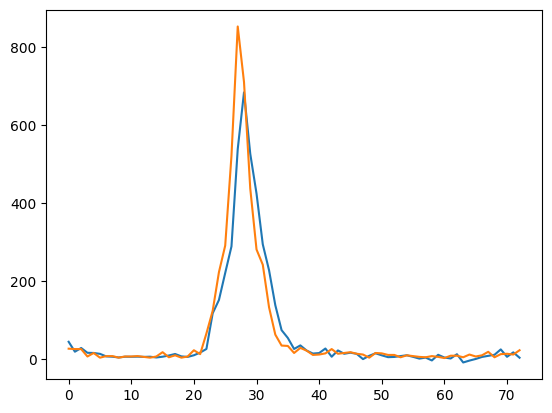

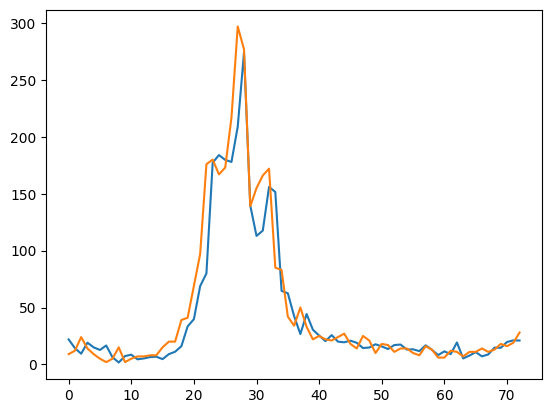

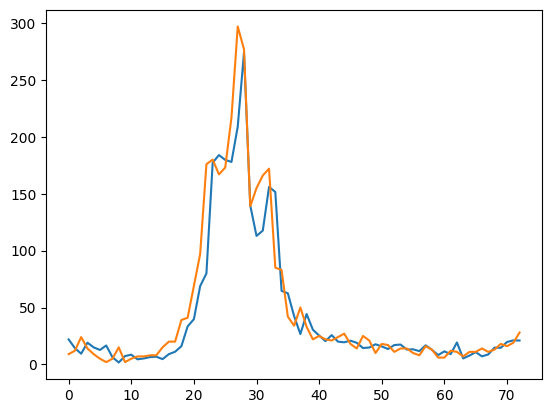

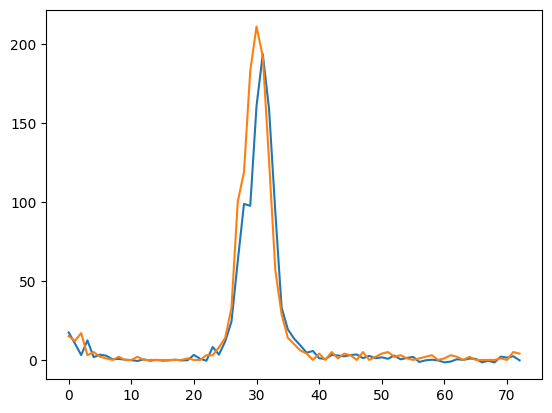

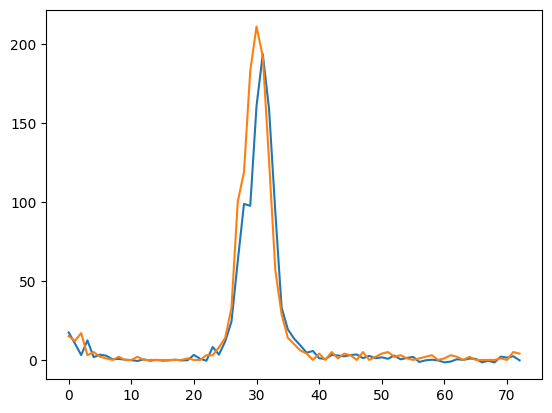

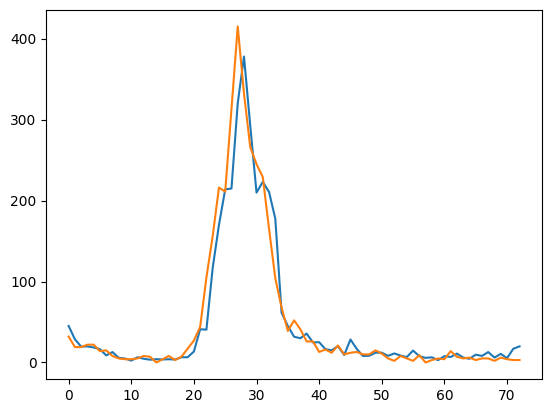

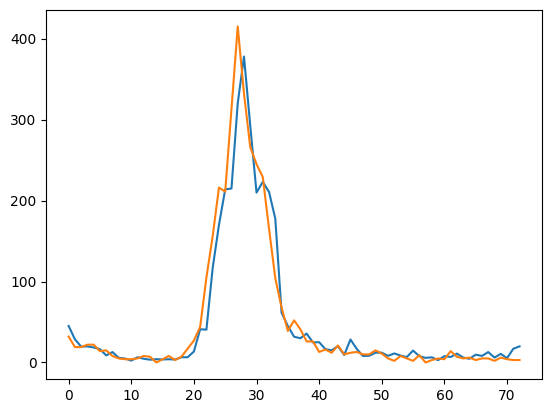

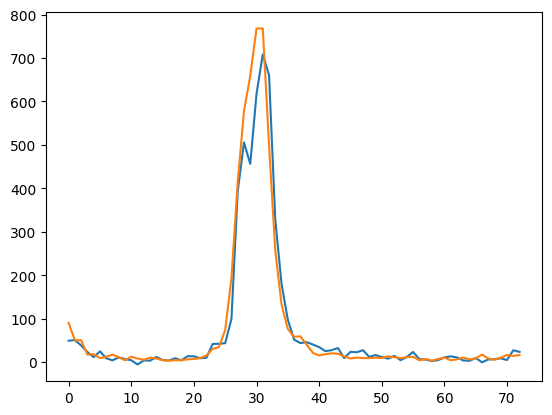

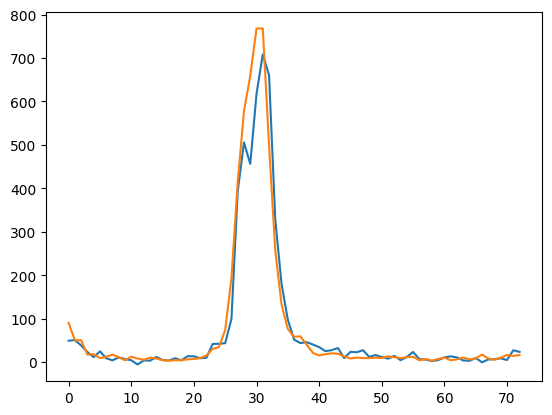

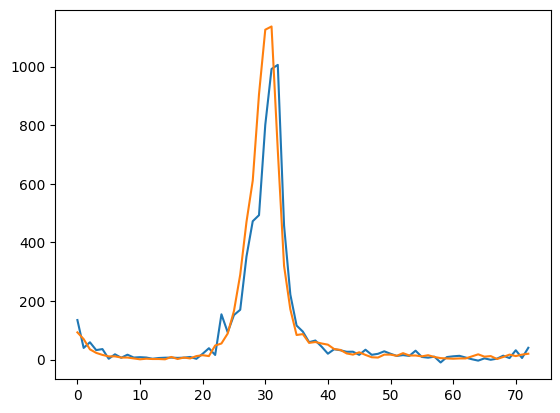

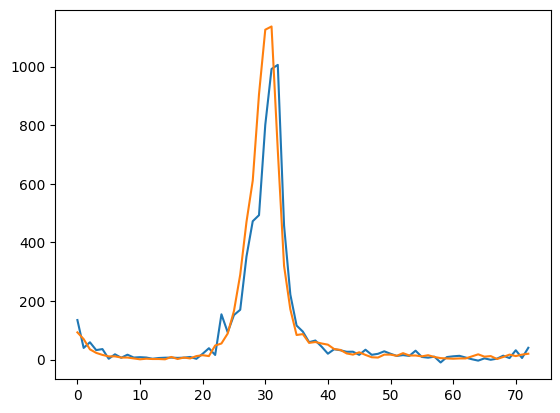

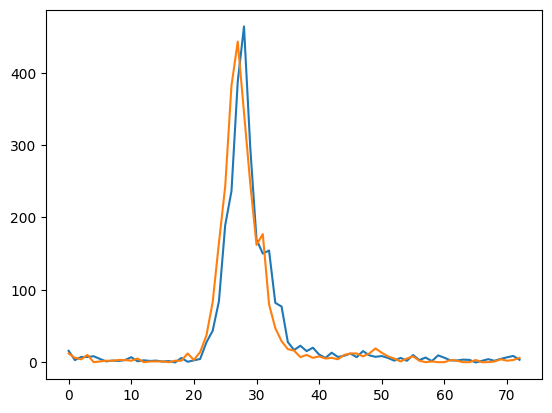

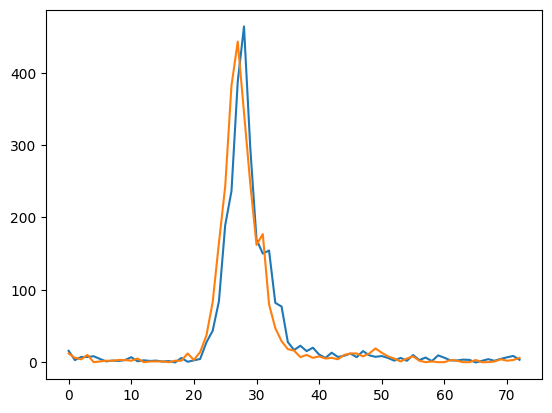

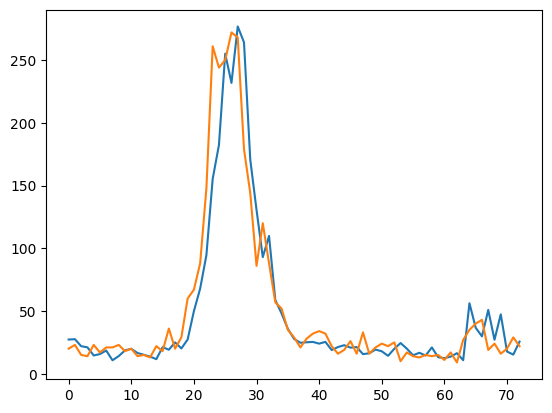

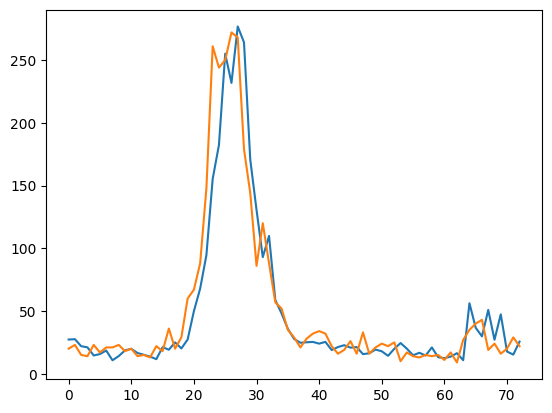

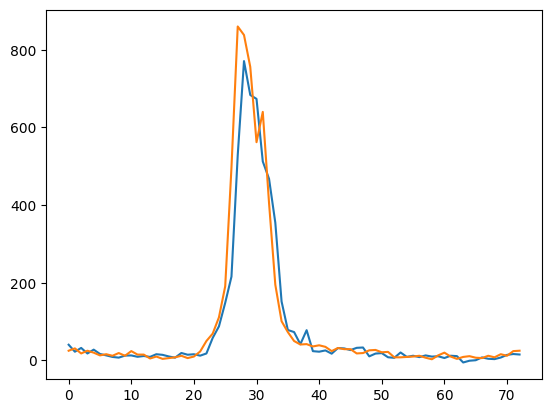

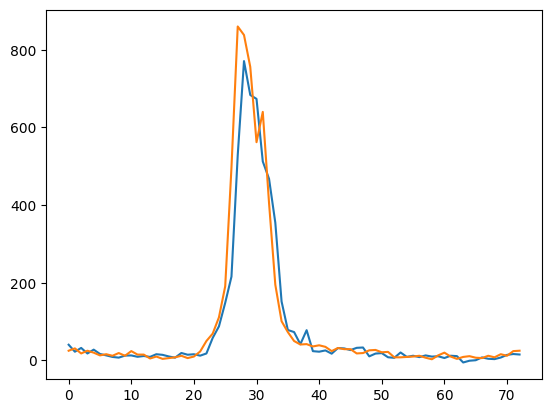

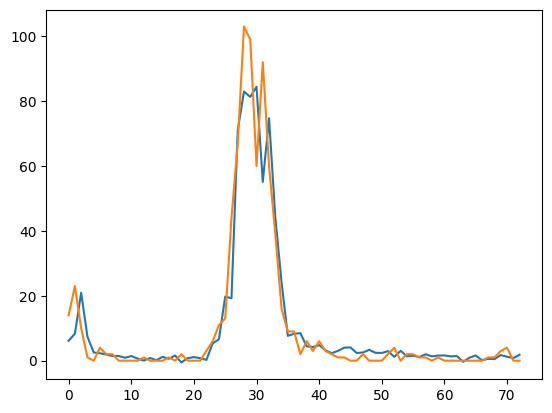

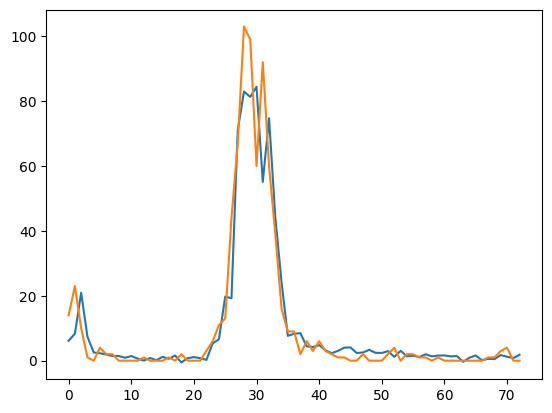

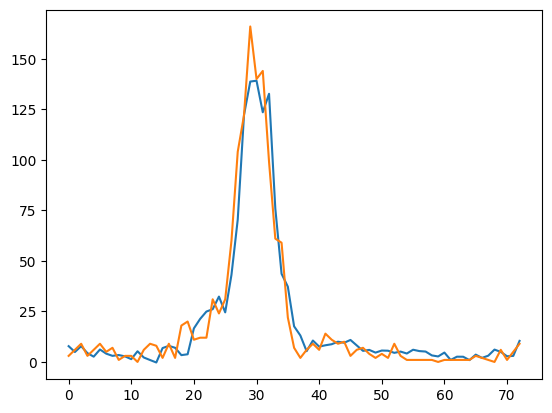

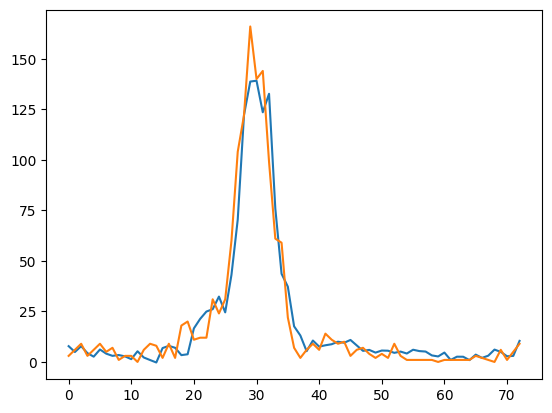

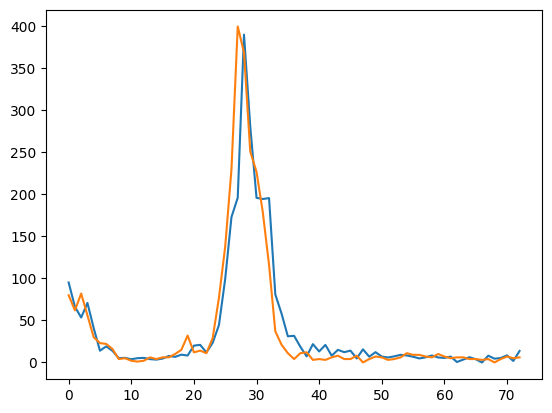

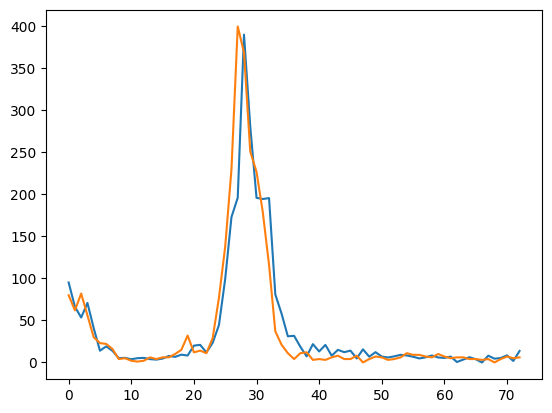

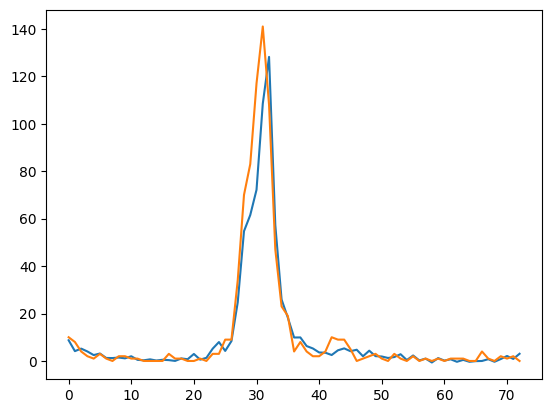

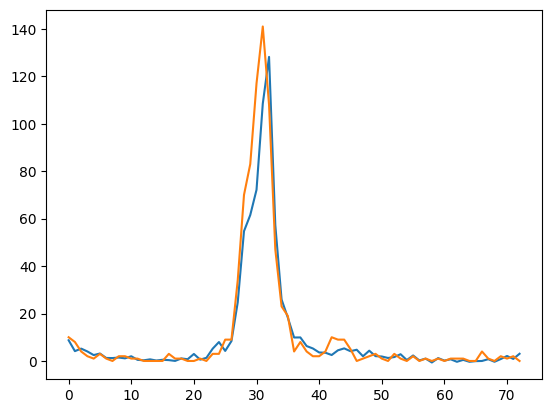

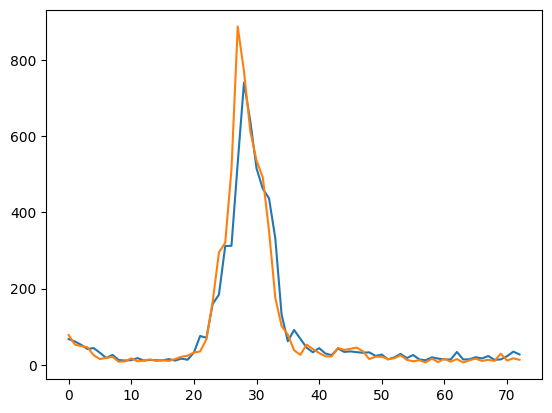

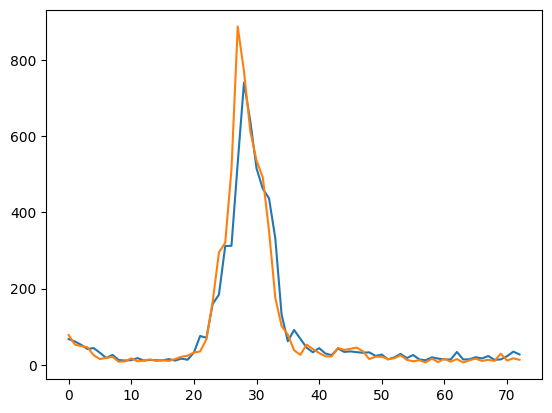

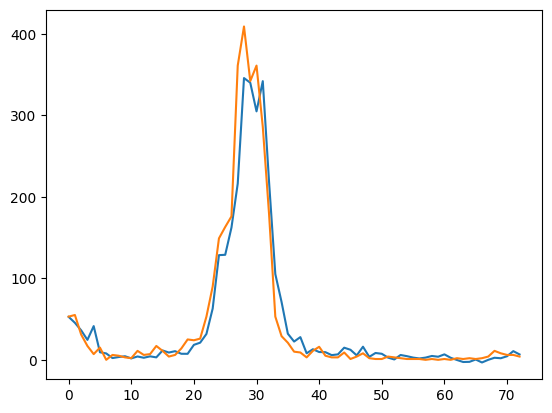

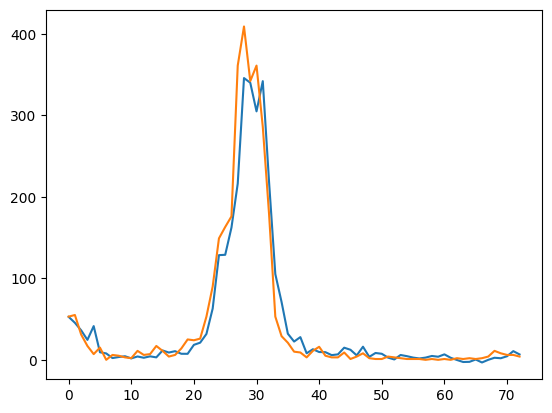

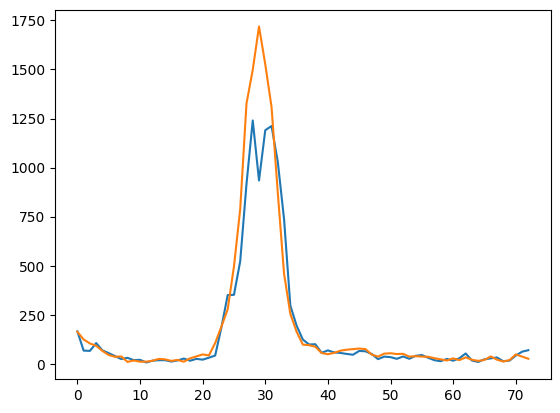

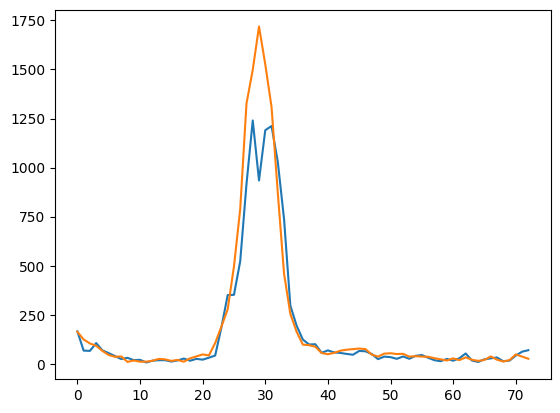

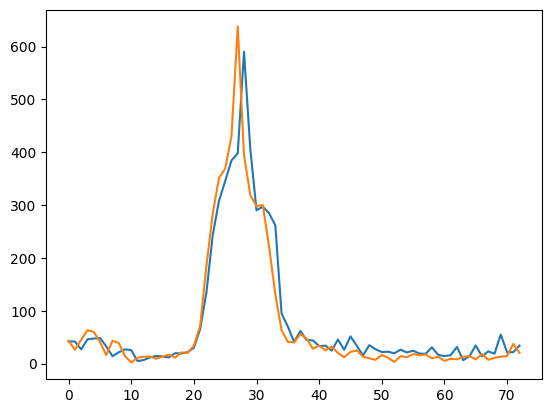

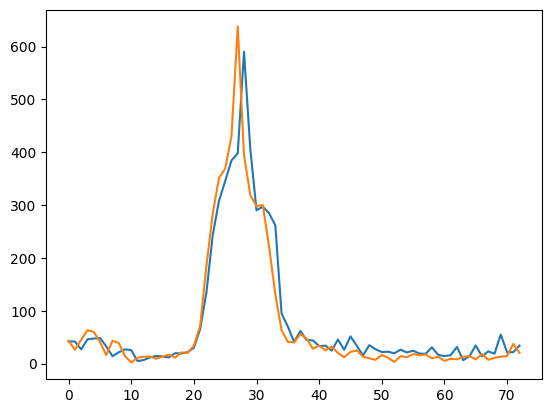

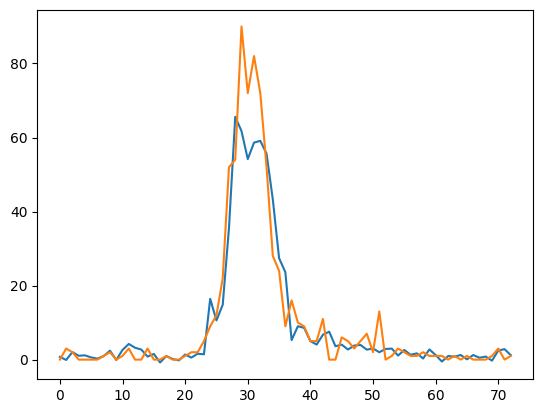

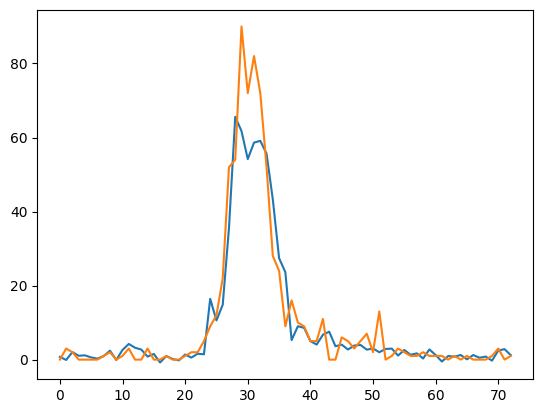

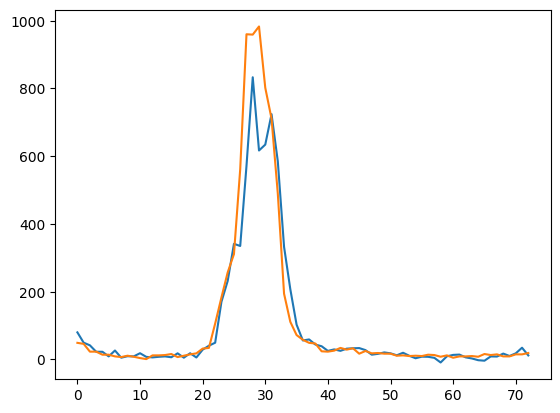

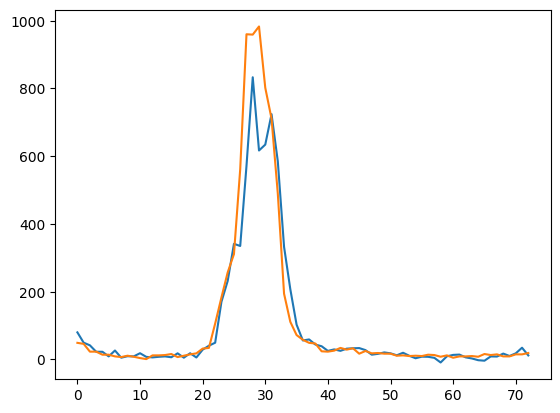

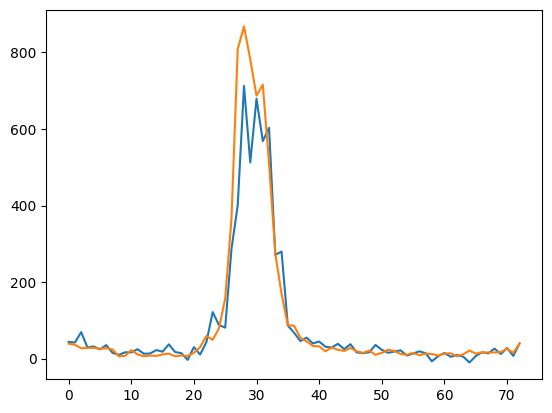

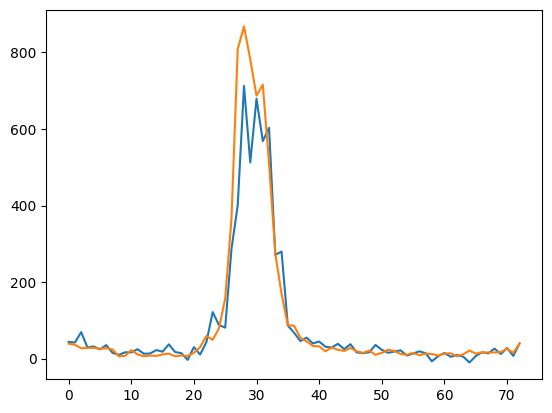

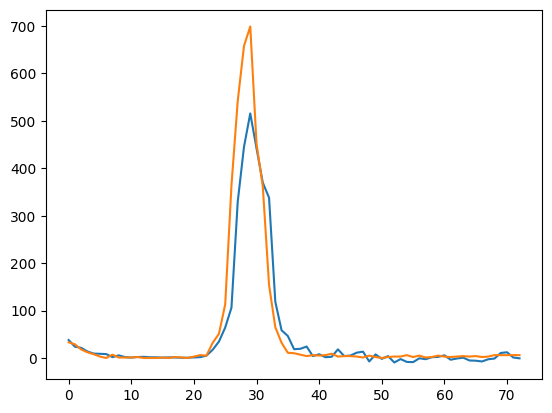

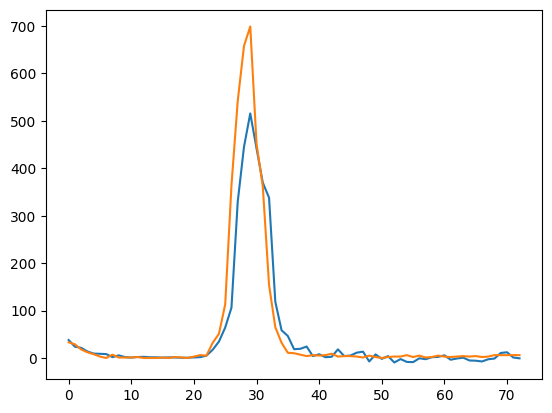

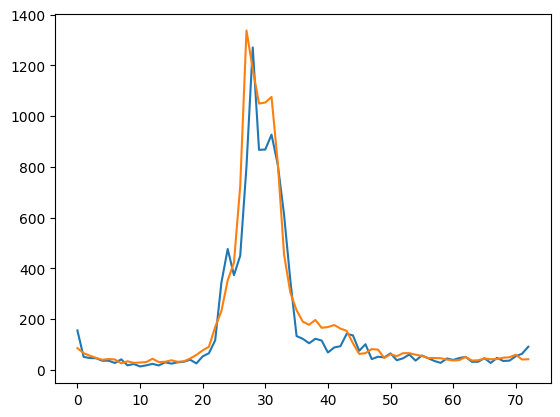

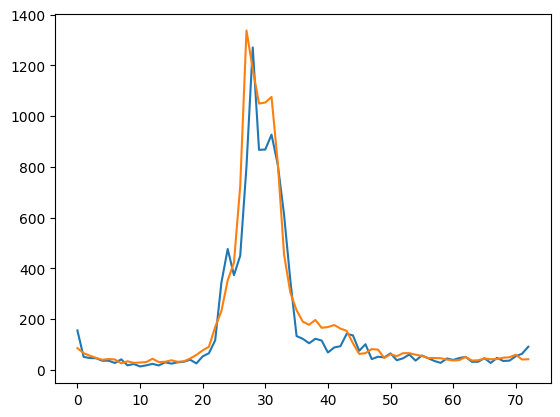

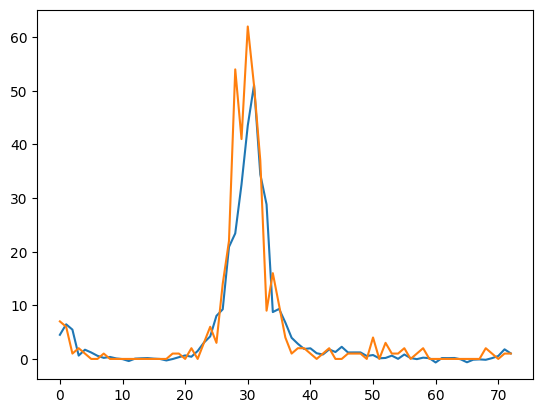

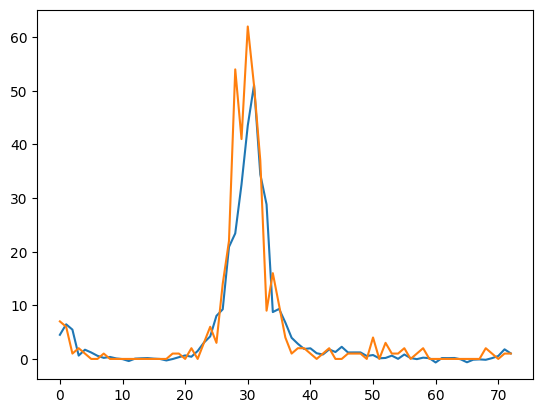

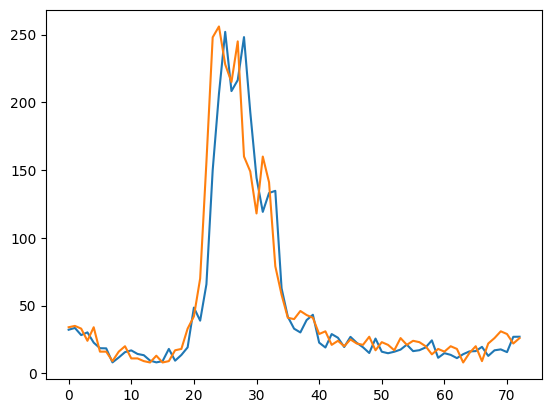

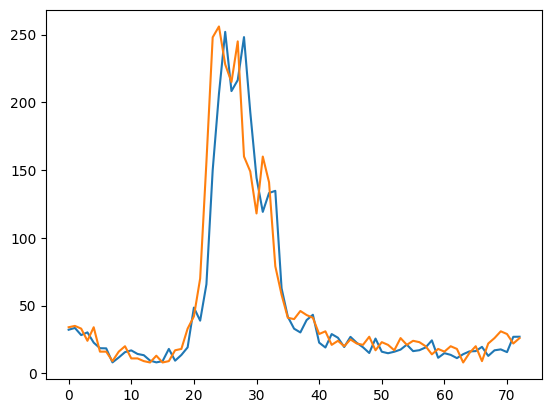

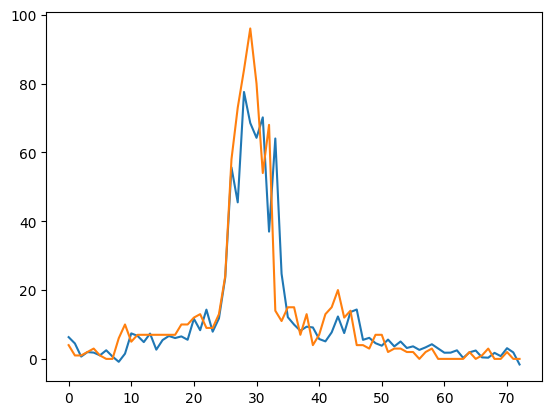

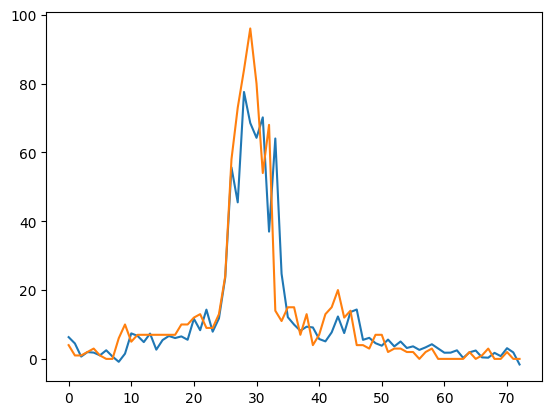

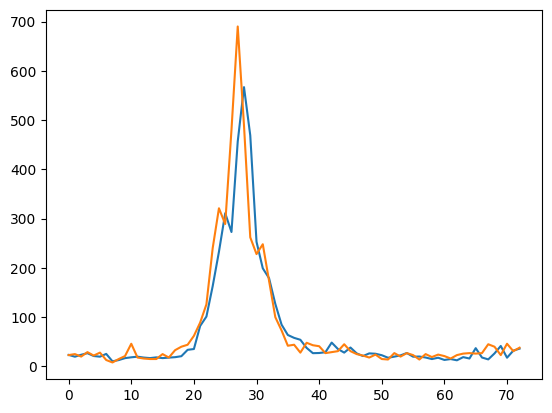

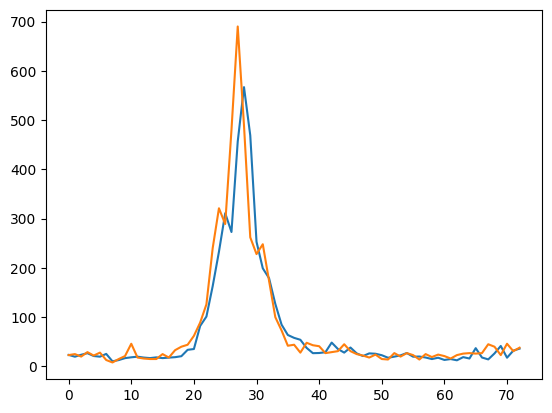

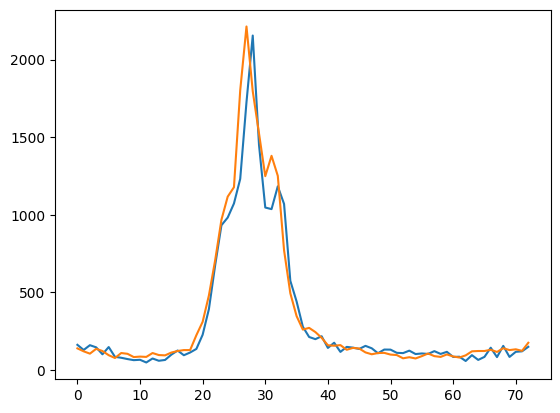

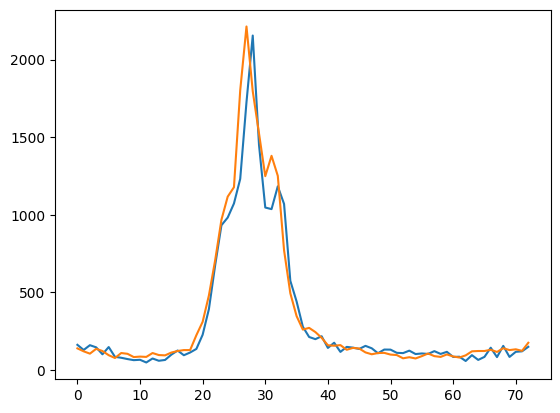

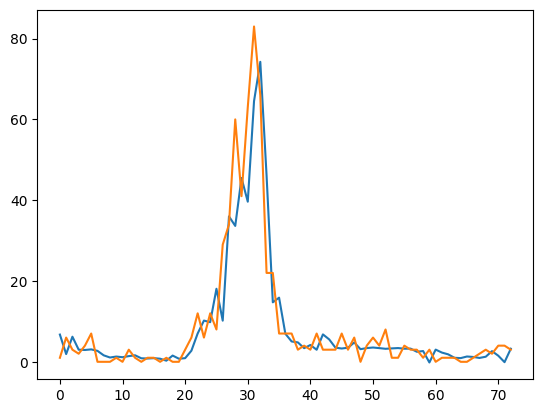

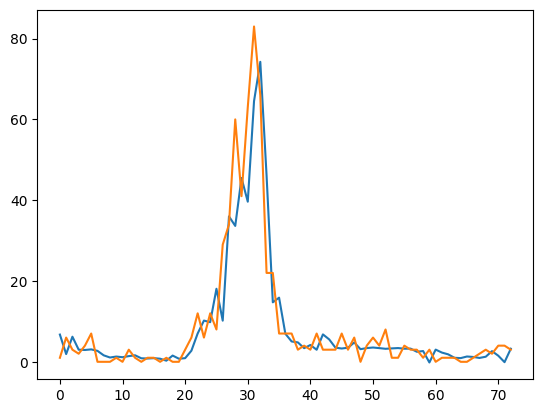

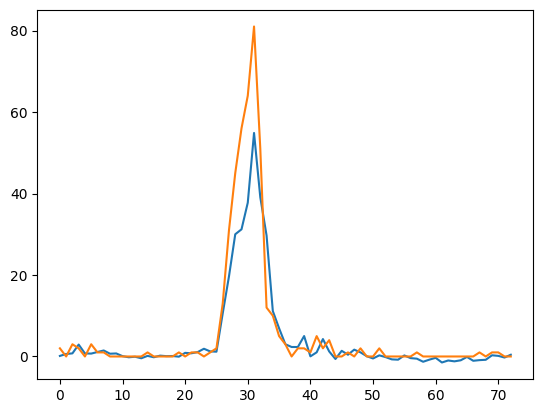

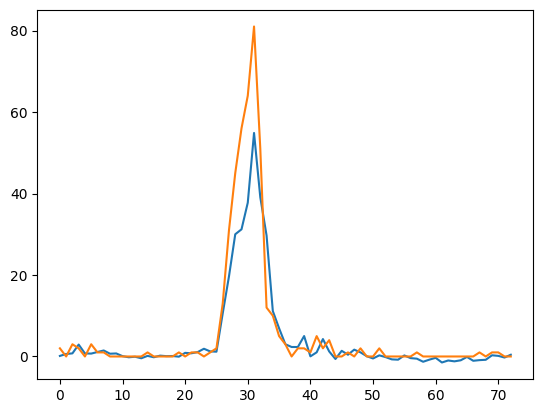

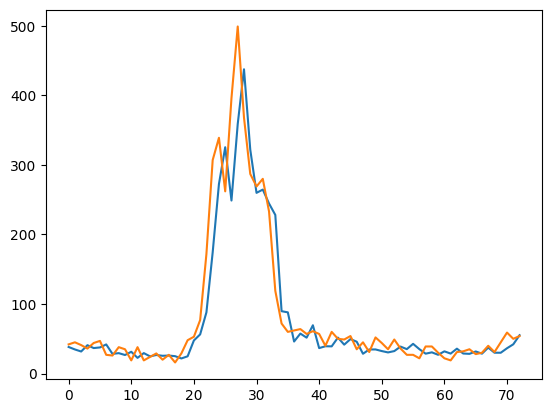

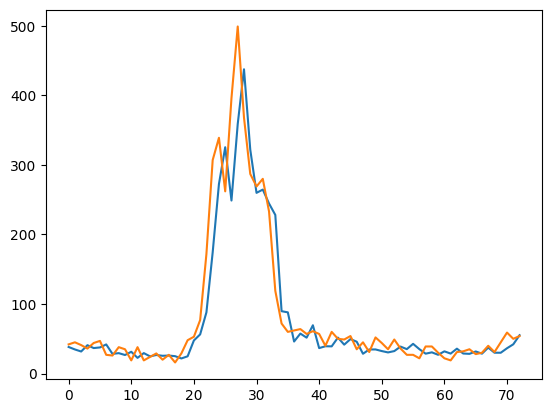

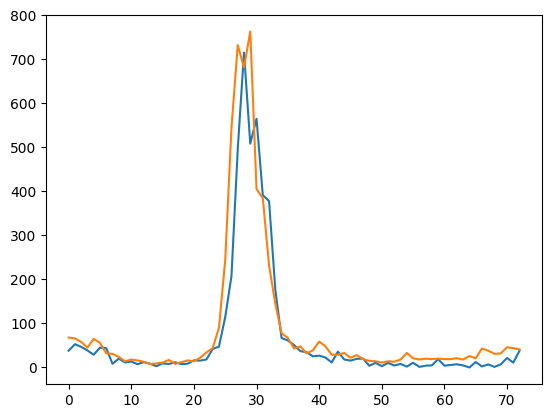

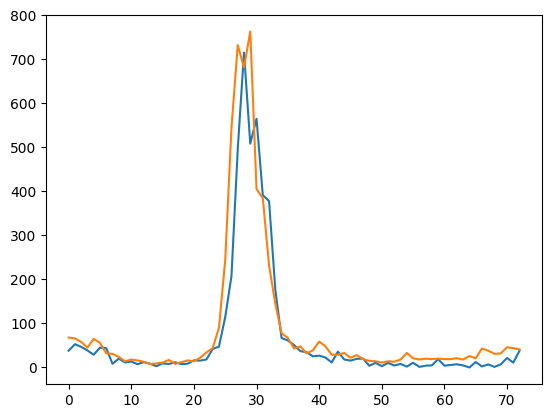

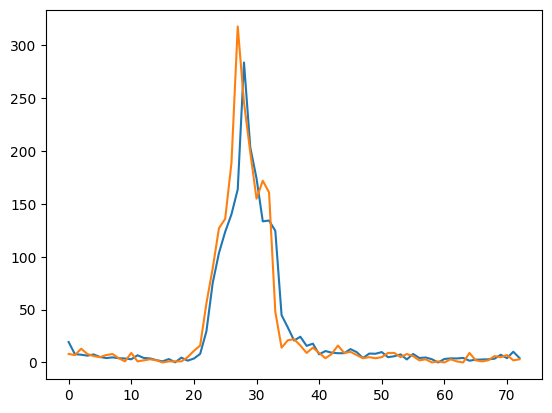

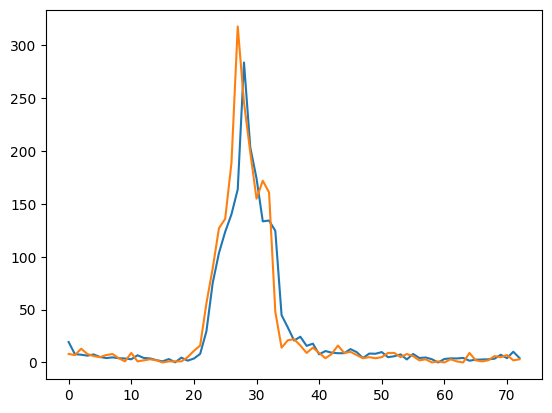

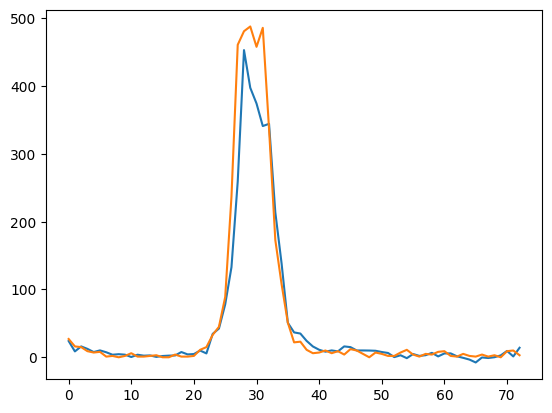

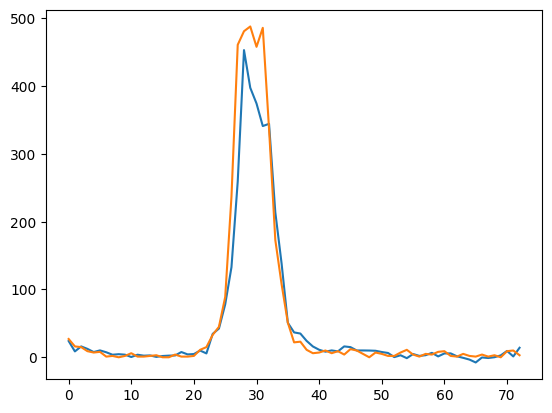

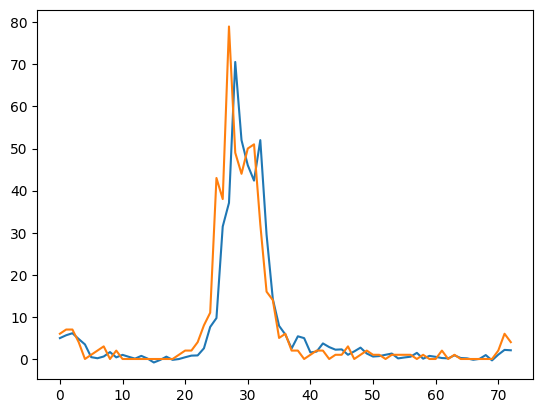

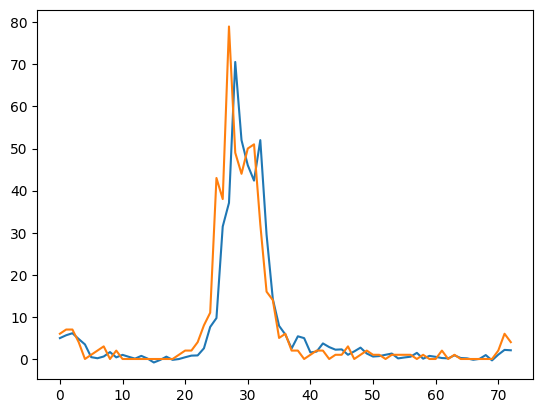

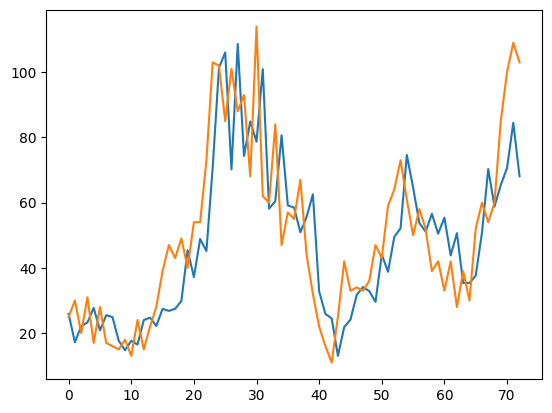

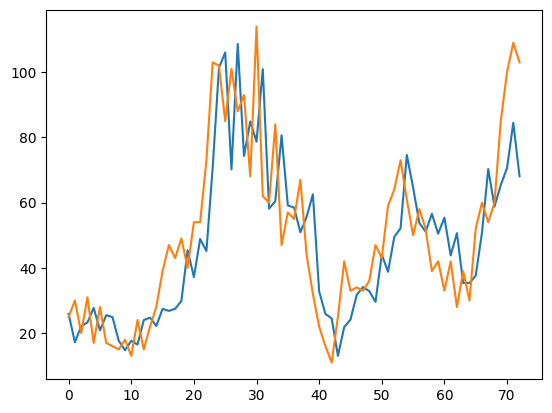

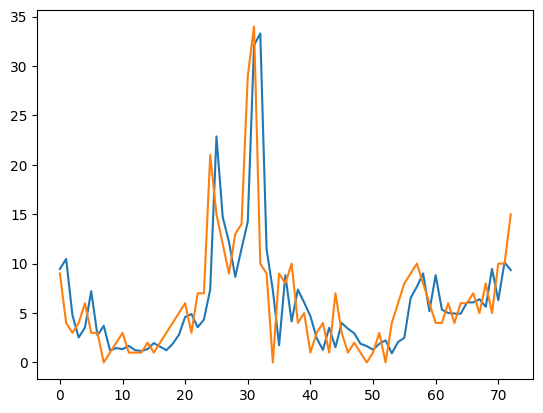

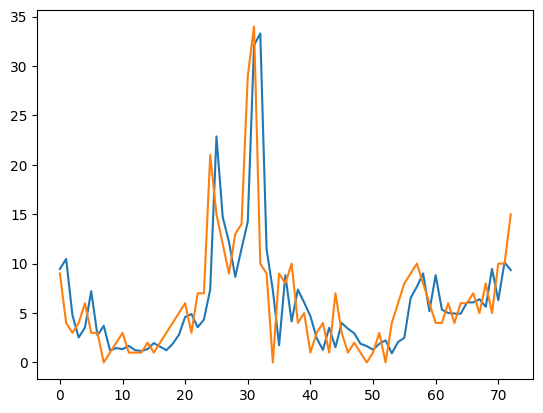

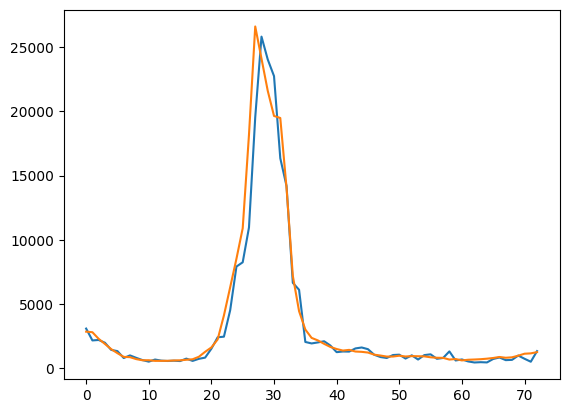

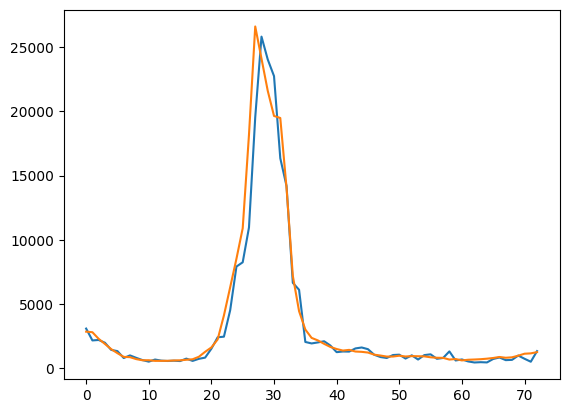

{'target': 'flu_hospitalizations', 'seed': 17, 'weeks_ahead': 5, 'input_files': {'parent_dir': '../../data/weekly/weeklydata', 'weekly_data': '202343.csv'}, 'data_params': {'start_week': '202044', 'min_sequence_length': 30, 'smooth_window': 4, 'pad_value': -9}, 'data_features': ['covid_hospitalizations', 'flu_hospitalizations', 'doctor_visits', 'symptom_Fever', 'symptom_Low_grade_fever', 'symptom_Cough', 'symptom_Sore_throat', 'symptom_Headache', 'symptom_Fatigue', 'symptom_Vomiting', 'symptom_Diarrhea', 'symptom_Shortness_of_breath', 'symptom_Chest_pain', 'symptom_Dizziness', 'symptom_Confusion', 'symptom_Generalized_tonic_clonic_seizure', 'percent_weighted_ili', 'percent_unweighted_ili', 'ilitotal', 'num_of_providers', 'total_patients'], 'regions': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC'

In [2]:
base_pred_file = f'../../results/base_pred/saved_pred_10001.pickle'
base_pred = pickle_load(base_pred_file, version5=True)['base_pred']
regions = list(base_pred[0][0].keys())
aheads = [1, 2, 3, 4, 5]
prev_scores = {}
for region in regions:
    prev_scores[region] = {}
    for ahead in aheads:
        oss_scores, _, _ = prepare_scores(base_pred, region, ahead, oss=True)
        dss_scores, _, _ = prepare_scores(base_pred, region, ahead, oss=False)
        prev_scores[region][ahead] = {
            True: oss_scores[:len(oss_scores)-ahead+1],
            False: dss_scores[:len(oss_scores)-ahead+1]
        }
pickle_save('../../results/prev_scores.pkl', prev_scores)
print(pickle_load(base_pred_file, version5=True)['params'])

In [3]:
print(prev_scores['US'][5][False])

[1.24081909e+02 6.23985107e+02 1.71706543e+02 4.30340576e+02
 9.48891602e+01 5.12845856e+02 1.28788269e+02 5.84794312e+01
 3.23443604e+00 3.97221069e+01 9.89500122e+01 3.68630371e+01
 1.29983521e+02 1.49689209e+02 3.62171326e+02 7.63820251e+02
 7.67277710e+02 1.73566092e+03 3.33519971e+03 5.57785065e+03
 6.66490015e+03 9.28127087e+03 1.35702158e+04 2.09807661e+04
 1.61219756e+04 1.54802168e+04 1.20446870e+04 9.09909961e+03
 6.62989404e+03 8.42440332e+03 5.51370801e+03 9.63806836e+03
 4.67363135e+03 4.83847900e+02 1.17587769e+02 1.06578345e+03
 4.27965576e+02 9.21265869e+01 3.13368408e+02 6.14909912e+02
 3.58609314e+02 1.31246094e+02 2.32551514e+02 8.88505371e+02
 3.33169434e+02 6.28046753e+02 2.17584229e+02 4.74750885e+02
 9.08521118e+01 1.03326355e+02 2.81162598e+02 2.03651428e+02
 9.11502075e+01 3.62404724e+02 8.30265503e+01 1.02346191e+03
 6.19136353e+01 7.46404419e+01 6.34109619e+02 2.41671173e+02
 3.78713196e+02 2.52165955e+02 4.75203491e+02 4.73028168e+02
 5.04500336e+02 4.511602